# Filter dan Jendela

Dapat dilihat bagaimana kita mendapatkan respon impuls dari filter rendah ideal, yaitu fungsi sinc. Terdapat permasalahan pada respon impuls ini, yaitu jika suatu respon impuls adalah non-kausal, kita juga tidak bisa membuatnya kausal karena respon impuls ini dimulai dari minus tak hingga.

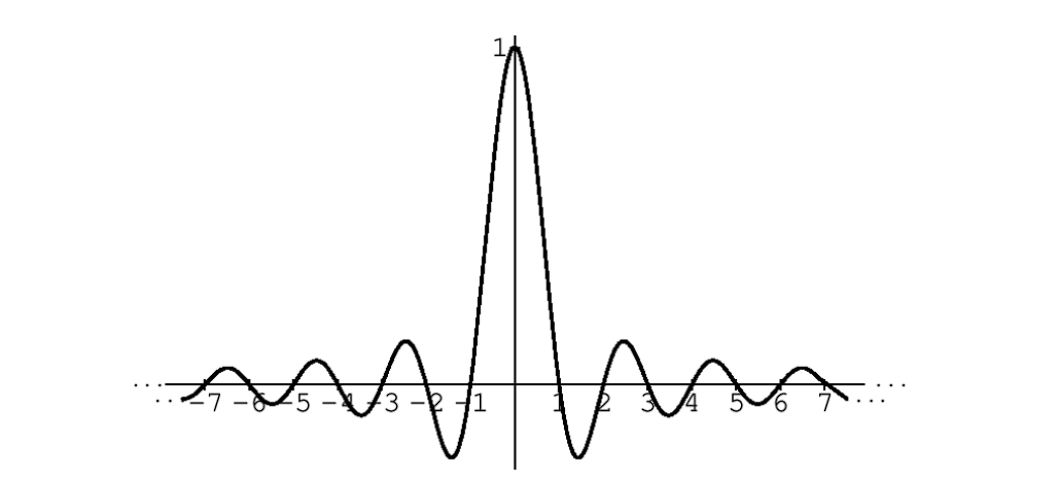

Misalkan kita menginginkan filter kausal FIR yang lemah, artinya respons impulsnya dimulai pada waktu 0 dan  hanya ada untuk sejumlah sampel terbatas, n=0,...,L-1, dengan panjang L.(Perhatikan bahwa filter FIR tidak memiliki sinyal analog dalam domain analog, filter analog selalu memiliki respons impuls tak terbatas, IIR)

Bagaimana kita dapat merancang filter ini sehingga menjadi mirip dengan beberapa filter ideal?

Contoh: Merancang filter anti-aliasing untuk konversi laju sampel: Sinyal asli yang berasal dari CD memiliki laju sampel 44,1 kHz, sehingga memiliki bandwidth audio yang berkisar hingga sekitar 20 kHz dan kami ingin menurunkan sampel ke 22 laju sampel  kHz, misalnya untuk komputer bulan Maret. Untuk melakukan downsample, sinyal harus disaring terlebih dahulu dengan lowpass filter, misalnya bandwidth harus antara 0 dan 9 kHz, dan stopband, untuk menghindari aliasing frekuensi di atas 11 kHz, harus maksimal 11 kHz. (di sini: 22,05 kHz). Karena kita tidak memiliki filter yang ideal, kita harus menyertakan pita "transisi", di sini dari 9 kHz ke 11 kHz, agar filter "transisi" dari pita sandi ke pita penghenti, dengan redaman menengah.

Aliasing ​​​​adalah sesuatu yang mudah dideteksi oleh telinga, jadi kami menginginkan redaman minimal 60 dB dari 11 kHz. Crossover dapat memiliki rentang respons frekuensi yang luas, misalnya ±2 dB (sesuai dengan tegangan sekitar ±25 µm). Rentang frekuensi dari 9 kHz hingga 11 kHz disebut  pita transisi, yang memberikan  filter kemampuan untuk membangun redaman dari 0 hingga 60 dB, untuk memastikan bahwa filter tersebut sudah memiliki 60 dB pada  11 kHz. Dengan cara ini kita dapat membuat klaim mengenai "kesamaan" filter kita, meskipun kita tahu bahwa kita tidak dapat mencapai filter yang optimal (pendekatan praktis).

Pendekatan pertama (mungkin naif) adalah  mendefinisikan kesamaan sebagai kesalahan kuadrat  respons frekuensi filter FIR kita relatif terhadap respons frekuensi ideal tertentu (ini biasanya berarti besarnya respons terhadap frekuensi). Keuntungannya adalah sangat sederhana secara matematis. Artinya, tujuan kita adalah meminimalkan kesalahan kuadrat ini. Misalkan respons frekuensi yang diinginkan adalah Hd(ω) dan respons frekuensi (aktual) dari filter FIR kausal kita adalah H(ω). Maka kesalahan kuadrat e adalah

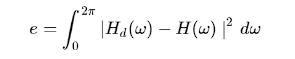

Karena ingin membuat kesalahan e sekecil mungkin. Perhatikan bahwa kita perlu melakukan integrasi di sini karena sinyal dalam domain frekuensi kontinu, karena sinyal dalam domain waktu tidak periodik (hanya dengan demikian transformasi Fourier frekuensinya diskrit). Tapi di sini kita memiliki fungsi sinc dengan rentang waktu tak terbatas. Perhatikan bahwa karena alasan ini kita juga  tidak dapat menerapkan transformasi Fourier diskrit, karena transformasi ini dibuat untuk sinyal periodik dengan periode terbatas (DFT biasanya hanya diterapkan  pada periode terbatas ini). Namun transformasi Fourier waktu diskrit dirancang untuk sinyal waktu diskrit dengan periode  tak terhingga.

Kita perlu meminimalkan kesalahan kuadrat e untuk menemukan perkiraan terbaik untuk filter FIR kita. Kita tidak dapat menyelesaikan permasalahan ini dalam domain frekuensi, namun kita dapat menyelesaikan rumus ekuivalennya dalam domain waktu.

Untuk mencapai hal ini, kami menggunakan teorema Parseval, yang menyatakan bahwa kekuatan suatu sinyal (jumlah  kuadrat amplitudonya) adalah sama dalam domain waktu dan  domain frekuensi (hal ini berlaku untuk transformasi Fourier waktu diskrit serta untuk DFT).


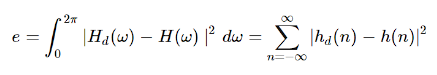

Sekarang didapatkan sebuah jumlah yang dapat dihitung lebih mudah.

Untuk filter rendah ideal, hd(n) adalah fungsi sinc. Untuk mendapatkan filter kausal, diperbolehkan untuk melakukan pergeseran waktu nd untuk respon impuls ideal. Hasilnya akan menjadi seperti ini:

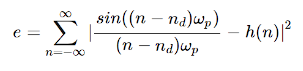

Bagaimana cara memilih h(n) dan nd untuk mendapatkan kesalahan kuadrat minimum e untuk panjang L yang diberikan dari h(n)?

Diberikan suatu panjang L, diperlukan untuk menentukan koefisien h(n) dan parameter tunda nd

Agar solusi mudah untuk dipahami, kita dapat membagi jumlahnya menjadi 2 bagian, satu untuk rentang h(n) dan satu untuk sisa:

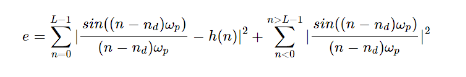

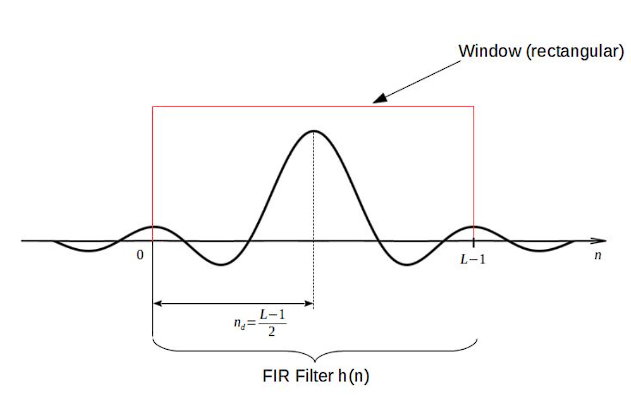

Fungsi jendela imajiner ini akan menjadi lebih menarik jika kita mengubah nilainya dari 1 ke nilai lainnya. Kita dapat melihat: Filter FIR = Fungsi  jendela Sinc kali kuadrat.

Catatan: Jika kita hanya menggunakan bagian terbatas dari fungsi Sinc sebagai filter maka kita secara implisit mengimplementasikan jendela persegi. Oleh karena itu, tidak perlu lagi dilakukan secara eksplisit.

Mengalikan fungsi jendela persegi dengan respons impuls ideal dalam domain waktu menjadi konvolusi  DTFT (Discrete Time Fourier Transform)  fungsi jendela persegi dengan respons frekuensi ideal dalam domain frekuensi. Dengan cara ini kita bisa melihat hasilnya di domain frekuensi. Pada dasarnya, respons frekuensi ideal (fungsi sinc) "kabur" karena kombinasi fungsi jendela dengan DTFT. Idealnya, DTFT  jendela ini harus berupa impuls frekuensi nol, sehingga konvolusi tidak akan mengubah respons frekuensi ideal. Tapi itu berarti ada jumlah waktu yang tidak terbatas dalam domain waktu. Kita mempunyai jendela kuadrat berhingga dalam domain waktu, yang merupakan fungsi Sinc lainnya dalam domain frekuensi, yang sangat berbeda dengan impuls yang frekuensinya tidak melebihi:

Catatan: Jendela dalam domain Semakin panjang waktunya, semakin sempit Fungsi sinkronisasi. dalam domain frekuensi dan semakin terlihat seperti impuls. Jadi untuk pemfilteran yang lebih baik kita memerlukan jendela yang lebih panjang.



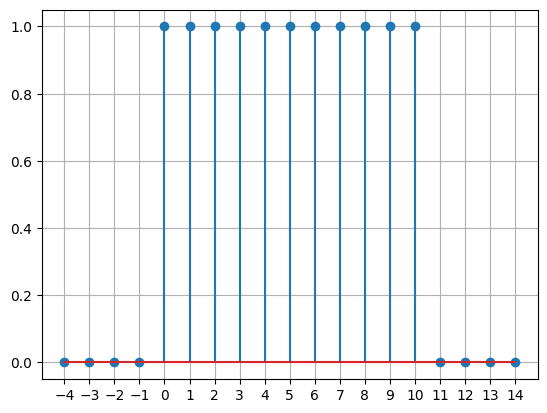

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

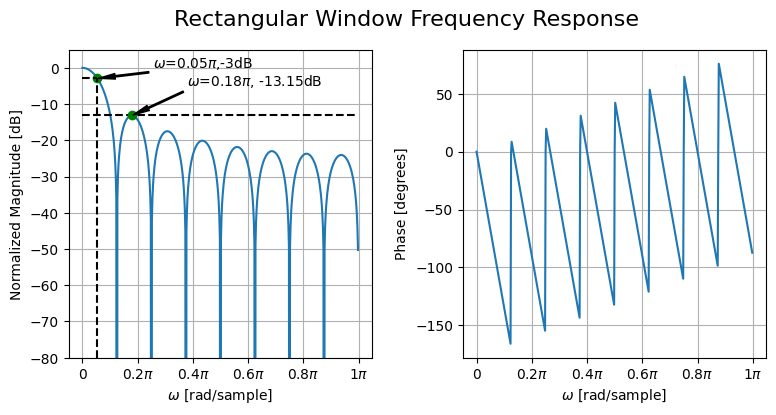

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--')
    ax1.plot((wp, wp), (-80, Hp), 'k--')
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--')
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')


    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')

Di sini kita  melihat bahwa pulsa frekuensinya jauh dari nol, nyatanya cukup lebar dan redamannya tidak terlalu besar, sekitar -15 hingga -20 dB. Berharap filter low-pass yang dihasilkan  "mewarisi" properti ini melalui konvolusi dalam domain frekuensi.

"Lebar pita silang" atau lebar lobus utama dari fungsi jendela kita akan menentukan bandwidth transisi dari filter  yang dihasilkan, dan redaman stopband yang dihasilkan pada jendela akan menentukan redaman band-stop karena filter kita.

Ini menunjukkan bahwa fungsi jendela adalah fitur utama dari filter FIR yang kita hasilkan.

Contoh: Mari kita ambil filter downsampling sebagai contoh, yang seharusnya mengurangi frekuensi  dari 11 kHz ke laju sampling 44,1 kHz. Diinginkan redaman -60 dB di stopband. Oleh karena itu, diperoleh frekuensi normalisasi pada awal stopband sebagai berikut: = ωs:


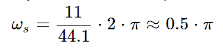

Oleh karena itu, respons frekuensi yang  kita inginkan adalah 1 antara frekuensi 0 dan ωs (atau lebih baik: antara −ωs dan ωs untuk  menyertakan sumbu frekuensi negatif). Sekarang ambil kebalikan DTFT dari respon frekuensi ideal yang diinginkan Hd(ω) untuk mendapatkan respon impuls ideal hd(n). Karena  awalnya kita menganggap filter ideal, kita mengatur ujung pita silang ωc sama dengan awal pita penghenti, ωc=ωs:


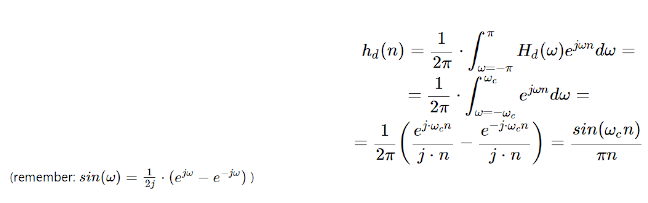

# Pendekatan Filter Rendah Ideal Menggunakan Jendela Persegi dan Tundaan

Telah dihasilkan bahwa respon impuls dari filter rendah ideal adalah:

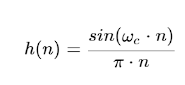

Dengan memotong respon impuls sehingga memiliki panjang L dan menerapkan tundaan nd = (L-1)/2, dihasilkan:

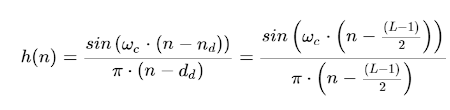

In [ ]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

In [ ]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

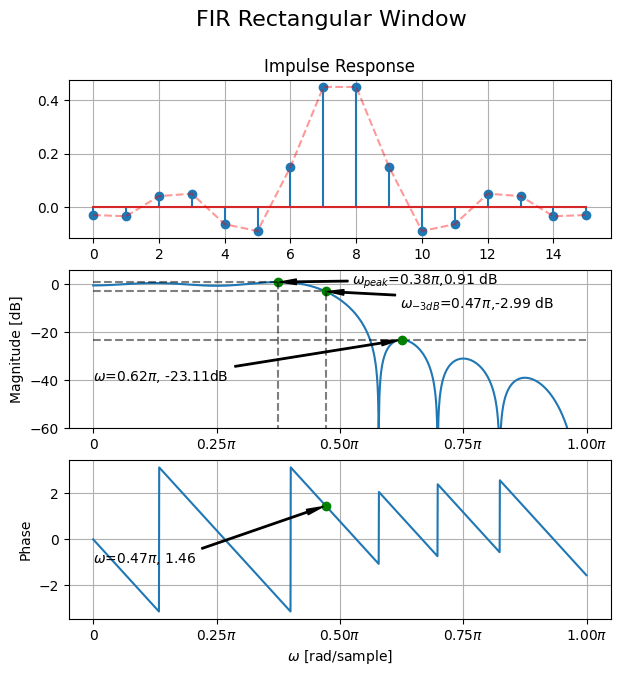

In [ ]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()

    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)

    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]),
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5)
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5)
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]),
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)

Sekarang diinginkan memiliki panjang filter L=16. Maka tundaan untuk membuat filter yang dihasilkan kausal adalah nd = (L-1)/2 = 7.5. Oleh karena itu, filter akan menjadi:

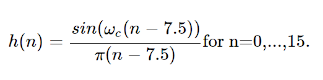

Berikut adalah filter FIR kausal dengan fungsi jendela persegi. Pita lintas memiliki gelombang sekitar +/- 0,5 dB. 0,5 dB sesuai dengan faktor yang berarti hanya 6% overshoot atau undershoot, dan biasanya sudah cukup baik.

Namun, di sini kita juga dapat melihat bahwa filter ini dapat memiliki redaman sekitar -10 dB pada frekuensi normal 0,5⋅π, dan sublobe pertama hanya memiliki redaman sekitar -20 dB. Oleh karena itu, filter ini tidak memenuhi persyaratan kami untuk redaman minimal -60 dB  dari frekuensi normal 0,5⋅π.

Untuk jejak fase: Kita mempunyai penundaan sebesar nd=7.
5 dengan filter kita. Karena ini adalah filter fase linier, kami memperkirakan fasenya adalah -7,5⋅ω. Kita bisa memeriksanya di plot kita, misalnya pada frekuensi ω=0,1⋅π, di plot kita pada sumbu x 0,1. Menghitung dalam derajat, kita mendapatkan 7,5⋅0,1⋅π⋅180π=135. Ini adalah apa yang kita lihat di plot.

Sekarang kita mempunyai filter yang memiliki  kesalahan kuadrat minimum dari nilai ideal yang diberikan. Namun apakah ini benar-benar yang kita inginkan?

Masalah yang kita hadapi disebut "fenomena Gibbs". Artinya, patahan tampak sebagai gelombang dengan kekuatan pita silang dan pita berhenti. Yang menarik adalah bahwa gelombang di dekat tepi diagonal dan stop band tidak mengecil seiring bertambahnya L  (kesalahan perkiraan semakin kecil), namun justru semakin menyempit. Ini adalah hasil penggabungan respons frekuensi ideal kami dengan fungsi sinc jendela persegi. Fungsi sinc ini semakin kecil seiring bertambahnya panjang L, namun tinggi gelombangnya tetap sama.

Artinya error maksimum yang kita peroleh tidak berkurang seiring bertambahnya L.

Catatan: Ukuran gelombang di dekat tepi pita silang dan pita penghenti hanya menjadi lebih sempit (mengakibatkan berkurangnya area dan dengan demikian mengurangi kesalahan kuadrat), namun tingginya tidak berkurang dengan bertambahnya L. Di sini, selalu tetap sekitar 0,1 di stopband, setara dengan sekitar -20 dB.

Untuk melihat bagaimana fenomena Gibbs terjadi, kita dapat melihat plot kita dalam domain frekuensi:

Intinya, kita mengalikan respon impuls ideal kita dengan kuadrat jendela. Dalam domain frekuensi, ini berarti konvolusi  respon frekuensi ideal (dengan perubahan fasa melalui penundaan) dengan respon frekuensi  jendela persegi. Yang terakhir adalah fungsi sinus sempit, dengan gelombang yang sesuai di kedua sisi lobus utamanya. Dan gelombang ini nampaknya merupakan fenomena Gibbs. Jika kita memanjangkan jendela  (L lebih besar), fungsi sinc menjadi lebih sempit, namun tinggi gelombang tidak berkurang tetapi tetap tidak berubah.



Dalam sebagian besar aplikasi, apa yang kita inginkan bukanlah meminimalkan kesalahan kuadrat, tetapi meminimalkan kesalahan maksimum.

Alih-alih menggunakan jendela persegi, kita bisa menggunakan jendela alternatif yang memiliki gelombang lebih rendah dalam domain frekuensi.

Jendela yang umum digunakan adalah jendela cosine raised.